In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML Project/Cleaned data/Train-Test/train.csv')
data = data.drop(columns=['Unnamed: 0','subject_id'])
X = data.drop(columns='slope_following_9_months')
y = data['slope_following_9_months']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=2021)

In [ ]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [ ]:
def evaluation_metrics(y_test, y_pred):
  R2 = metrics.r2_score(y_test, y_pred).round(4)
  Adjusted_R2 = (1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)).round(4)
  MAE = metrics.mean_absolute_error(y_test, y_pred).round(4)
  MSE = metrics.mean_squared_error(y_test, y_pred).round(4)
  RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4)
  Pearson_Correlation = pearsonr(y_test, y_pred)[0].round(4)

  evaluatin_table = pd.DataFrame.from_dict({"R^2": R2,
                                            "Adjusted R^2": Adjusted_R2,
                                            "MAE": MAE,
                                            "MSE": MSE,
                                            "RMSE": RMSE,
                                            "Pearson_Correlation": [Pearson_Correlation],
                                            }, 
  )

  return evaluatin_table

In [ ]:
evaluatin_table = evaluation_metrics(y_test, y_pred)
evaluatin_table

,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,-0.323,-4.432,0.73,1.0203,1.0101,0.1444


+ 𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.
$R2 = text{metrics.r2_score(y_test, y_pred)}$

+ Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

+ MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

+ MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

+ RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

+ Pearson Correlation: Pearson's correlation ρ is a relative measure that evaluates how well a prediction method is able to recover ALSFRS trends across patients. Better predictions lead to a higher value of the correlation, up to 1.0 for the perfect prediction. 

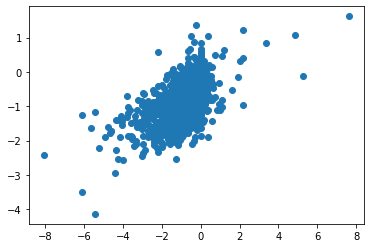

In [ ]:
plt.scatter(y_train, y_pred)